<a href="https://colab.research.google.com/github/alynensilva/Atividade-Probabilidade-e-Estatistica/blob/main/Atividade_Ativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Ativa - Probabilidade e Estatística
### Alyne do Nascimento Silva

Para realizar este trabalho, será utilizada a base de dados  KaggleV2-May-2016.csv. Primeiramente, é necessário fazer *upload* do arquivo:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


Para trabalhar com os dados, serão utilizadas as bibliotecas Pandas e Matplotlib.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
consultas=pd.read_csv("KaggleV2-May-2016.csv")

Para visualizar um resumo dos dados, utiliza-se o método *describe*:

In [ ]:
consultas.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As chaves da planilha podem ser visualizadas por meio do método *keys*:

In [ ]:
consultas.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Agora, é possível responder às perguntas propostas:

1) Quantas consultas foram realizadas no total?

In [ ]:
consultas['AppointmentID'].count()

110527

2) Qual a quantidade de pacientes desta base?

In [ ]:
unico = consultas[~consultas.PatientId.duplicated()]
unico['PatientId'].nunique()


62299

3) Quantos homens e mulheres estão armazenados na base?

In [ ]:
unico['Gender'].value_counts()


F    40046
M    22253
Name: Gender, dtype: int64

4) Qual a idade média dos homens desta base?

In [ ]:
temporario1 = unico[(unico['Gender'] == 'M')]
temporario1['Age'].mean()


33.32750640363097

5) Qual a média de consultas marcadas pelos pacientes do sexo feminino?

In [ ]:
temporario2 = consultas[(consultas['Gender'] == "F")]
temporario2['AppointmentID'].describe()

count    7.184000e+04
mean     5.674337e+06
std      7.201597e+04
min      5.030230e+06
25%      5.639222e+06
50%      5.679852e+06
75%      5.724905e+06
max      5.790484e+06
Name: AppointmentID, dtype: float64

6) Faça um boxplot mostrando com a idade, apenas dos pacientes que têm hipertensão

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
26,2.578785e+10,5641781,F,2016-04-29T14:19:42Z,2016-04-29T00:00:00Z,45,BENTO FERREIRA,0,1,0,0,0,0,No


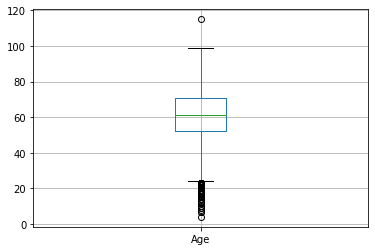

In [ ]:
temp_ht = unico[(unico['Hipertension'] == 1.0)]
temp_ht.boxplot(column='Age')
temp_ht.head()

7) Faça uma tabela mostrando a distribuição de idade para cada um dos bairros da pesquisa

In [ ]:
unico[['Neighbourhood', 'Age']].groupby(['Neighbourhood']).mean()

,Age
Neighbourhood,
AEROPORTO,52.428571
ANDORINHAS,35.631951
ANTÔNIO HONÓRIO,39.845714
ARIOVALDO FAVALESSA,35.049724
BARRO VERMELHO,44.393519
...,...
SÃO JOSÉ,33.775292
SÃO PEDRO,35.449405
TABUAZEIRO,35.172414




8) Há outliers na idade dos pacientes?

De acordo com o gráfico abaixo, há um *outlier* próximo à marca de 120 anos de idade.

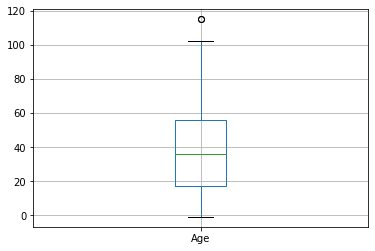

In [ ]:
unico.boxplot(column='Age')

9) Faça um boxbplot da idade dos pacientes que são alcoólatras.

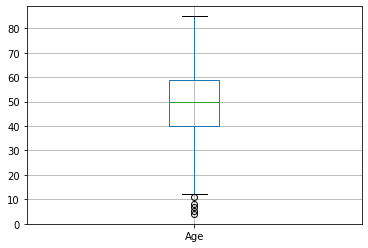

In [ ]:
alcoolatras = unico[(unico['Alcoholism'])==1.0]
alcoolatras.boxplot(column='Age')

10) Há algum outlier em relação à idade dos pacientes alcoólatras?

Há outliers abaixo da marca de 10 anos de idade.

11) Utilizando os dados contidos na tabela, é possível afirmar que há causalidade entre os pacientes com alcoolismo e diabéticos? A causalidade existe entre a idade e diabetes?

Pela tabela de contingência abaixo, nota-se que não há casualidade expressiva entre diabetes e alcoolismo. Já a idade média de pessoas que têm diabtes é de 61 anos, contra 34 das que não têm diabetes.

In [ ]:
tab = pd.crosstab(unico['Alcoholism'], unico['Diabetes'])
print(tab)

Diabetes        0     1
Alcoholism             
0           56548  4245
1            1335   171


In [ ]:
unico[['Diabetes', 'Age']].groupby(['Diabetes']).mean()

,Age
Diabetes,
0,34.796486
1,61.719429
